<a href="https://colab.research.google.com/github/lmencisoe/ADL/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller3
# Vihlai Maldonado, Miguel Enciso

## Problema
La comunidad científica es de la comunidad más activa que existe a la hora de realizar publicaciones en grandes revistas. Los avances tecnológicos, las facilidades a la hora de encontrar información y la gran cantidad de médicos dedicados a realizar estudios y publicarlos ha aumentado a tal punto que realizar una categorización de estos textos sería ideal para poder filtrar la información y acceder a ella de una manera más rápida y precisa.

Para eso, le han disponibilizado los Abstracts de diferentes artículos de los cuales los expoertos los han clasificado en diferentes categorias, y la idea es poder automatizar este proceso para que futuros artículos puedan ser clasificados automáticamente sin necesidad de disponer del tiempo de los expertos.

Para resolver el modelo, es importante que construyan la mejor Red Neuronal Recurrente que puedan encontrar. El procesamiento, la tokenización, la limpieza de los textos, la definición de los Embedding y la arquitectura de la Red Neuronal, así como la utilización de Redes Preentrenadas están a su criterio. Lo importante es documentar todos los pasos anteriormente descritos.

Datos: https://raw.githubusercontent.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Taller%202/train.dat



In [ ]:
!pip install contractions
import nltk
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.3 MB/s 
     |████████████████████████████████| 287 kB 39.7 MB/s 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.layers import TextVectorization

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
plt.style.use("seaborn-deep")
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

#Analisis profundo de datos
from pandas_profiling import ProfileReport
from sklearn.feature_extraction import DictVectorizer

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from sklearn.metrics import accuracy_score

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from keras.utils import np_utils
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Perfilamiento y entendimiento de los datos


Lectura de los datos

In [ ]:
url = "https://raw.githubusercontent.com/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Taller%202/train.dat"
data = pd.read_csv(url, sep="\t",header=None)
data.head()

,0,1
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...


### Exploración de datos

In [ ]:
def plot_count_plot_percentages(data_df, column):
  ax = sns.countplot(data=data_df, x=column, color="teal")
  ax.set(title = 'Distribución de la variable ')
  total = float(len(data_df[column]))
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

A continuación revisamos la distribución de las etiquetas en el conjunto de datos:

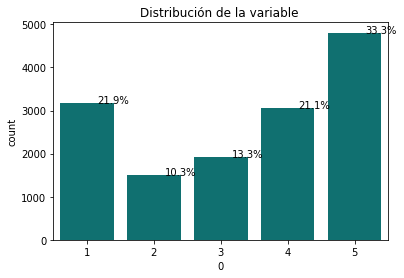

In [ ]:
plot_count_plot_percentages(data, 0)

De la gráfica anterior observamos que el mayor porcentaje está en la clase 5 con 33.3%, y la clase de menor porcentaje es la 2 con 10.3%

In [ ]:
#Datos duplicados
data[data.duplicated(keep=False)]

,0,1


Del resultado anterior observamos que no tenemos registros duplicados en el conjunto de datos.

In [ ]:
#Datos duplicados
null_data_df = data[data.isnull().any(axis=1)]
null_data_df

,0,1


Del resultado anterior observamos que no tenemos registros faltantes en el conujunto de datos.

A continuación se realizan las gráficas de las palabras para cada clase

In [ ]:
def plot_word_cloud(words,stopwords=[]):
    comment_words = ''
    
    # iterate through the csv file
    for val in words:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

---------- Words for class: 1 ----------


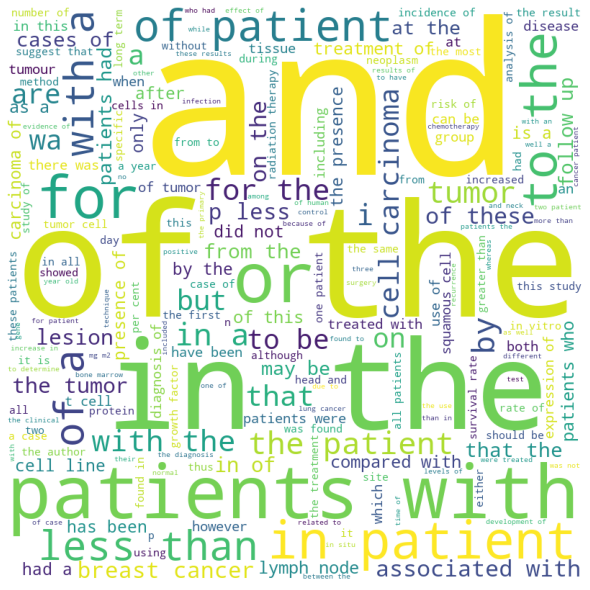

---------- Words for class: 2 ----------


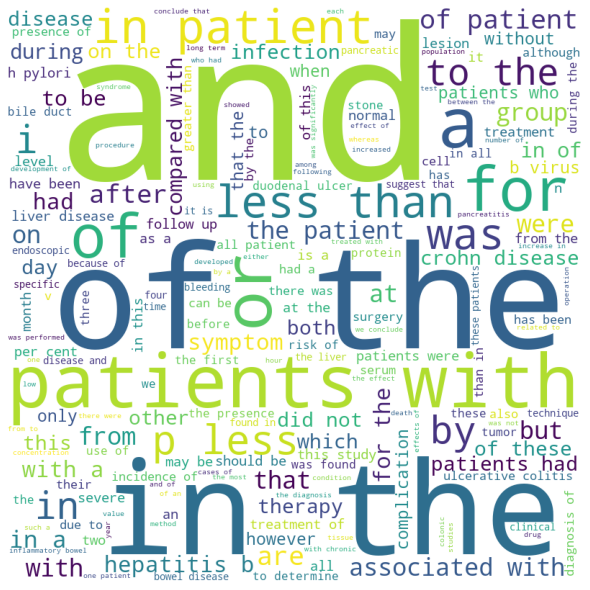

---------- Words for class: 3 ----------


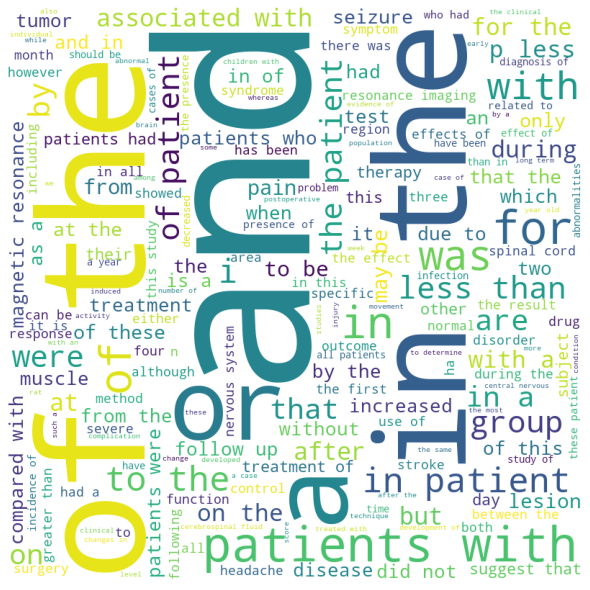

---------- Words for class: 4 ----------


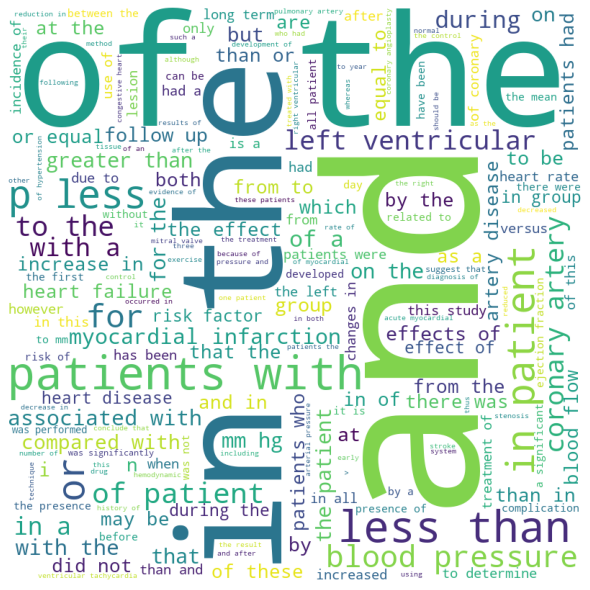

---------- Words for class: 5 ----------


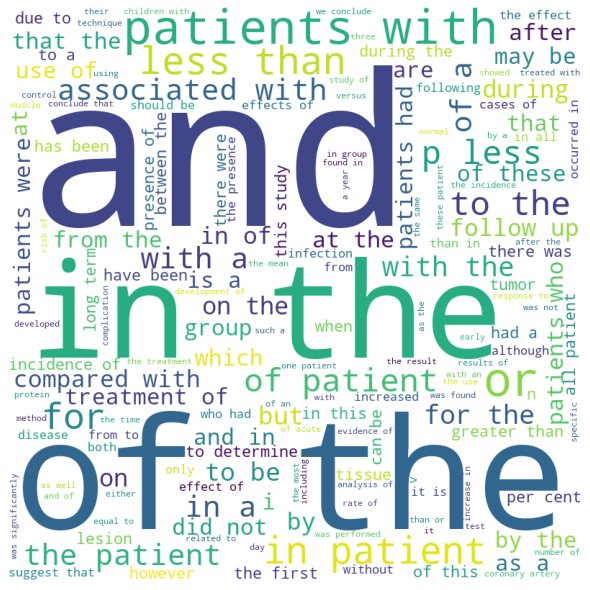

In [ ]:
for class_text in np.sort(data[0].unique())-1:
    print(f'---------- Words for class: {class_text+1} ----------')
    plot_word_cloud(data.loc[data[0]==(class_text+1),1])

Separación conjunto entrenamiento, validación y test

In [ ]:

# train.head()

In [ ]:
# X_train, y_train = train[1], train[0]
# display(X_train)
# y_train

In [ ]:
def split_dataset(data):
  X_train, X_test, y_train, y_test = train_test_split(data['trans'], data[0], test_size=0.2, random_state=33)
  X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=33)
  batch_size = 1024
  train_ds = tf.data.Dataset.from_tensor_slices((X_train.tolist(), y_train.tolist())).batch(batch_size)
  val_ds = tf.data.Dataset.from_tensor_slices((X_val.tolist(), y_val.tolist())).batch(batch_size)
  test_ds = tf.data.Dataset.from_tensor_slices((X_test.tolist(), y_test.tolist())).batch(batch_size)
  return train_ds, val_ds, test_ds

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [ ]:
# new_X_train= X_train.apply(contractions.fix)
# new_X_train = new_X_train.apply(word_tokenize)
# new_X_train = new_X_train.apply(preproccesing)
# new_X_train.head()

In [ ]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words
def preproccesing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = stem_and_lemmatize(words)
    return words
# new_X_train = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
# new_X_train.head()

In [ ]:
data[2]= data[1].apply(contractions.fix).apply(word_tokenize).apply(preproccesing)

In [ ]:
data['transform'] = data[1].apply(contractions.fix).apply(word_tokenize).apply(to_lowercase).apply(remove_punctuation).apply(remove_non_ascii).apply(remove_stopwords).apply(lambda x: ' '.join(map(str, x)))
data['transform']

0        catheterization laboratory events hospital out...
1        renal abscess children three cases renal absce...
2        hyperplastic polyps seen sigmoidoscopy markers...
3        subclavian artery innominate vein fistula inse...
4        effect local inhibition gammaaminobutyric acid...
                               ...                        
14433    quadricuspid aortic valve aortic regurgitation...
14434    mammographic measurements augmentation mammapl...
14435    use leukocytedepleted platelet concentrates pr...
14436    complications tenckhoff catheters post removal...
14437    fatal severely disabling cerebral infarction h...
Name: transform, Length: 14438, dtype: object

In [ ]:
data['trans'] = data[2].apply(lambda x: ' '.join(map(str, x)))


In [ ]:
data.head()

,0,1,2,trans
0,4,Catheterization laboratory events and hospital...,"[cathet, lab, ev, hospit, outcom, direct, angi...",cathet lab ev hospit outcom direct angioplasty...
1,5,Renal abscess in children. Three cases of rena...,"[ren, abscess, childr, three, cas, ren, absces...",ren abscess childr three cas ren abscess child...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...,"[hyperplast, polyp, see, sigmoidoscop, mark, a...",hyperplast polyp see sigmoidoscop mark addit a...
3,5,Subclavian artery to innominate vein fistula a...,"[subclav, artery, innomin, vein, fistul, inser...",subclav artery innomin vein fistul insert hemo...
4,4,Effect of local inhibition of gamma-aminobutyr...,"[effect, loc, inhibit, gammaaminobutyr, acid, ...",effect loc inhibit gammaaminobutyr acid uptak ...


In [ ]:
# Embed a 1,000 word vocabulary into 5 dimensions.
embedding_layer = tf.keras.layers.Embedding(1000, 5)

In [ ]:
result = embedding_layer(tf.constant([1, 2, 3]))
result.numpy()

array([[ 0.04305739, -0.00842156,  0.03867245,  0.02719393, -0.03234271],
       [ 0.01006847, -0.03358807, -0.0151125 ,  0.00995989,  0.04374951],
       [ 0.04466976,  0.04237257,  0.03103318,  0.03502702, -0.04152305]],
      dtype=float32)

In [ ]:
train_ds, val_ds, test_ds = split_dataset(data)

In [ ]:
# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')


vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

## Modelo base

In [ ]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="Capa_Embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu', name='Capa_Oculta'),
  Dense(1, activation='sigmoid', name='Capa_Salida')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 Capa_Embedding (Embedding)  (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 Capa_Oculta (Dense)         (None, 16)                272       
                                                                 
 Capa_Salida (Dense)         (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trai

In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.1995 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 2/30
10/10 [==============================] - 1s 54ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 3/30
10/10 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 4/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 5/30
10/10 [==============================] - 1s 49ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 6/30
10/10 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - val_loss: 0.0000e+00 - val_accuracy: 0.2139
Epoch 7/30
10/10 [==============================] - 1s 55ms/step - loss: 0.0000e+00 - accuracy: 0.2212 - 

## Predicción

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
y_true = list()
y_pred = list()

for text_batch, label_batch in train_ds:
    pred = model.predict(text_batch)
    for i in range(len(pred)):
        y_true.append(label_batch[i].numpy())
        y_pred.append((pred[i] > 0.5).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_true, y_pred

ValueError: ignored

Confusion matrix, without normalization


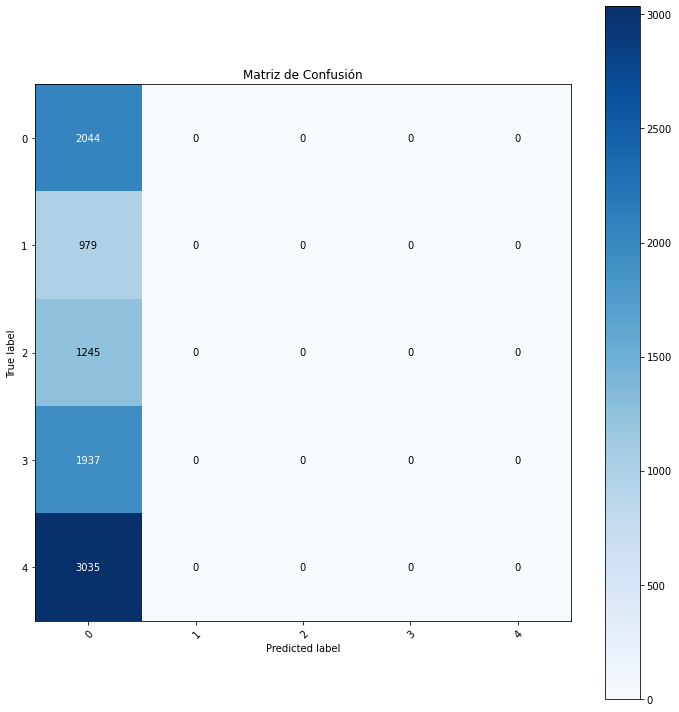

In [ ]:
plot_confusion_matrix(y_true=y_true, y_pred=y_pred, classes=['0','1', '2', '3', '4'],
                      title='Matriz de Confusión')

In [ ]:
report_train = classification_report(y_true, y_pred, target_names=['0','1', '2', '3', '4'])

print("Train Report\n", report_train)

Train Report
               precision    recall  f1-score   support

           0       0.22      1.00      0.36      2044
           1       0.00      0.00      0.00       979
           2       0.00      0.00      0.00      1245
           3       0.00      0.00      0.00      1937
           4       0.00      0.00      0.00      3035

    accuracy                           0.22      9240
   macro avg       0.04      0.20      0.07      9240
weighted avg       0.05      0.22      0.08      9240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data_2 = data.copy()
data_2

,0,1,2,transform
0,4,Catheterization laboratory events and hospital...,"[cathet, lab, ev, hospit, outcom, direct, angi...",catheterization laboratory events hospital out...
1,5,Renal abscess in children. Three cases of rena...,"[ren, abscess, childr, three, cas, ren, absces...",renal abscess children three cases renal absce...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...,"[hyperplast, polyp, see, sigmoidoscop, mark, a...",hyperplastic polyps seen sigmoidoscopy markers...
3,5,Subclavian artery to innominate vein fistula a...,"[subclav, artery, innomin, vein, fistul, inser...",subclavian artery innominate vein fistula inse...
4,4,Effect of local inhibition of gamma-aminobutyr...,"[effect, loc, inhibit, gammaaminobutyr, acid, ...",effect local inhibition gammaaminobutyric acid...
...,...,...,...,...
14433,4,Quadricuspid aortic valve and aortic regurgita...,"[quadricuspid, aort, valv, aort, regurgit, dia...",quadricuspid aortic valve aortic regurgitation...
14434,1,Mammographic measurements before and after aug...,"[mammograph, meas, aug, mammaplasty, thirtyf, ...",mammographic measurements augmentation mammapl...
14435,1,Use of leukocyte-depleted platelet concentrate...,"[us, leukocytedeplet, platelet, cont, prev, re...",use leukocytedepleted platelet concentrates pr...
14436,2,Complications of Tenckhoff catheters post remo...,"[comply, tenckhoff, cathet, post, remov, compl...",complications tenckhoff catheters post removal...


In [ ]:
data_2['label'] = data_2[0]
data_2['text'] = data_2['transform']
data_2['text0'] = data_2[1]
data_2 = data_2[['label', 'text', 'text0']]
data_2

,label,text,text0
0,4,catheterization laboratory events hospital out...,Catheterization laboratory events and hospital...
1,5,renal abscess children three cases renal absce...,Renal abscess in children. Three cases of rena...
2,2,hyperplastic polyps seen sigmoidoscopy markers...,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,subclavian artery innominate vein fistula inse...,Subclavian artery to innominate vein fistula a...
4,4,effect local inhibition gammaaminobutyric acid...,Effect of local inhibition of gamma-aminobutyr...
...,...,...,...
14433,4,quadricuspid aortic valve aortic regurgitation...,Quadricuspid aortic valve and aortic regurgita...
14434,1,mammographic measurements augmentation mammapl...,Mammographic measurements before and after aug...
14435,1,use leukocytedepleted platelet concentrates pr...,Use of leukocyte-depleted platelet concentrate...
14436,2,complications tenckhoff catheters post removal...,Complications of Tenckhoff catheters post remo...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


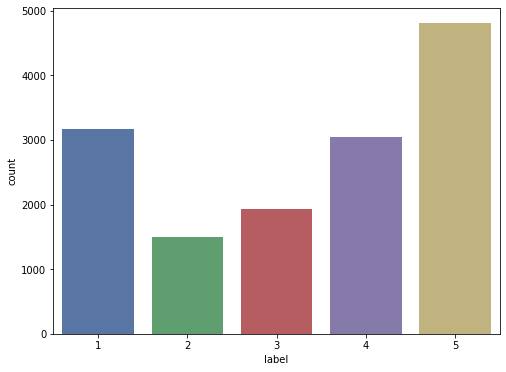

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data_2.label)

In [ ]:
data_et1 = data_2[data_2['label']==1]
data_et2 = data_2[data_2['label']==2]
data_et3 = data_2[data_2['label']==3]
data_et4 = data_2[data_2['label']==4]
data_et5 = data_2[data_2['label']==5]

In [ ]:
data_et1_s = data_et1.sample(n = len(data_et2), random_state = 2022)
data_et3_s = data_et3.sample(n = len(data_et2), random_state = 2022)
data_et4_s = data_et4.sample(n = len(data_et2), random_state = 2022)
data_et5_s = data_et5.sample(n = len(data_et2), random_state = 2022)

In [ ]:
#data_et1_s = data_et1
#data_et3_s = data_et3
#data_et4_s = data_et4
#data_et5_s = data_et5

In [ ]:
data_model = pd.concat([data_et1_s, data_et2, data_et3_s, data_et4_s, data_et5_s])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The distribution of ham and spam messages')

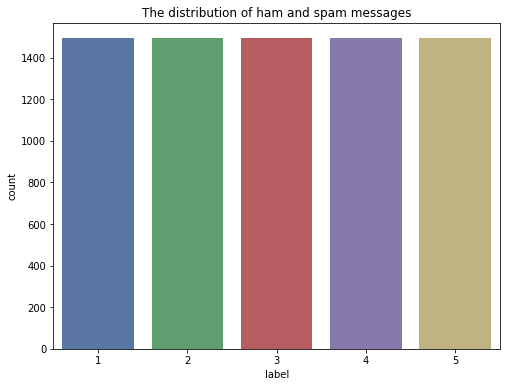

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data_model.label)
plt.title('The distribution of ham and spam messages')

In [ ]:
data_model['text_length'] = data_model['text'].apply(len)
data_model_label = data_model['label'].values

In [ ]:
data_model

,label,text,text_length
11756,1,stage iv neuroblastoma infants longterm surviv...,924
13676,1,growth factor requirements childhood acute tly...,1232
2164,1,sequential connection flaps logical approach c...,1116
12223,1,intraepithelial anchoring fibril components cu...,606
6707,1,phase imaging trial indium 111labeled antiepid...,1181
...,...,...,...
3866,5,puppetlike syndrome angelman pathologic neuroc...,984
3031,5,prognostic determinants extracorporeal membran...,1136
1019,5,distribution enkephalins human carotid bodies ...,683
3217,5,anaplastic carcinoma presenting cervical lymph...,780


In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(data_model_label)
encoded_Y = encoder.transform(data_model_label)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_model['text'], dummy_y, test_size=0.2, random_state=2022)

In [ ]:
# Defining pre-processing parameters
max_len = 40
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [ ]:
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

33872

In [ ]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [ ]:
training_padded = training_padded.astype(float)

In [ ]:
scaler = StandardScaler()

In [ ]:
training_padded = scaler.fit_transform(training_padded)
training_padded

array([[-0.54970538,  1.30126225,  0.25825718, ..., -0.55875042,
        -0.32083198, -0.5631648 ],
       [ 0.51687821, -0.5458539 , -0.54731719, ..., -0.55875042,
         0.78325456, -0.5631648 ],
       [-0.54970538, -0.5458539 ,  0.84847998, ..., -0.55875042,
         0.40139004, -0.55502774],
       ...,
       [-0.54970538, -0.5458539 , -0.54731719, ..., -0.56687469,
        -0.55327126, -0.57130186],
       [-0.50399466, -0.5458539 ,  0.67300833, ..., -0.55875042,
        -0.54496985, -0.5631648 ],
       [-0.54970538, -0.5458539 , -0.54731719, ..., -0.09566685,
        -0.54496985, -0.5631648 ]])

In [ ]:
training_padded.dtype

dtype('float64')

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
testing_padded = testing_padded.astype(float)

In [ ]:
testing_padded = scaler.fit_transform(testing_padded)
testing_padded

array([[ 0.03141113,  0.57519908, -0.53498928, ...,  0.56042433,
        -0.52663178, -0.55138994],
       [-0.5409762 , -0.54296777, -0.53498928, ..., -0.55749583,
         1.35828488, -0.54325275],
       [-0.5409762 , -0.54296777, -0.53498928, ...,  1.56574821,
        -0.52663178, -0.54325275],
       ...,
       [-0.5409762 , -0.54296777, -0.53498928, ...,  1.69442967,
        -0.52663178, -0.47001804],
       [-0.5409762 , -0.54296777,  0.36502954, ..., -0.55749583,
        -0.23079284, -0.51884118],
       [-0.5409762 , -0.54296777, -0.3713495 , ...,  0.79365947,
        -0.30686571,  0.94585303]])

In [ ]:
testing_padded.dtype

dtype('float64')

In [ ]:
class_names = ['1','2','3','4','5']

In [ ]:
# Define parameter
vocab_size = 500
embedding_dim = 256
drop_value = 0.1
n_dense = 12
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(AveragePooling1D())
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5,activation='softmax',name='Capa_Respuesta'))

In [ ]:
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_74 (Embedding)    (None, 40, 256)           128000    
                                                                 
 average_pooling1d_5 (Averag  (None, 20, 256)          0         
 ePooling1D)                                                     
                                                                 
 global_average_pooling1d_45  (None, 256)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_132 (Dense)           (None, 128)               32896     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_133 (Dense)           (None, 64)              

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics=['acc'])

In [ ]:
num_epochs = 15
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(training_padded,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, y_test),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/15
187/187 - 3s - loss: 1.6101 - acc: 0.1941 - val_loss: 1.6102 - val_acc: 0.1948 - 3s/epoch - 14ms/step
Epoch 2/15
187/187 - 1s - loss: 1.6097 - acc: 0.1990 - val_loss: 1.6091 - val_acc: 0.2209 - 1s/epoch - 7ms/step
Epoch 3/15
187/187 - 1s - loss: 1.6095 - acc: 0.2036 - val_loss: 1.6084 - val_acc: 0.2229 - 1s/epoch - 8ms/step
Epoch 4/15
187/187 - 1s - loss: 1.6079 - acc: 0.2154 - val_loss: 1.6068 - val_acc: 0.2303 - 1s/epoch - 7ms/step
Epoch 5/15
187/187 - 1s - loss: 1.6059 - acc: 0.2180 - val_loss: 1.6025 - val_acc: 0.2276 - 1s/epoch - 8ms/step
Epoch 6/15
187/187 - 2s - loss: 1.6057 - acc: 0.2214 - val_loss: 1.6030 - val_acc: 0.2195 - 2s/epoch - 8ms/step
Epoch 7/15
187/187 - 1s - loss: 1.6046 - acc: 0.2192 - val_loss: 1.6000 - val_acc: 0.2403 - 1s/epoch - 7ms/step
Epoch 8/15
187/187 - 1s - loss: 1.6040 - acc: 0.2221 - val_loss: 1.5991 - val_acc: 0.2369 - 1s/epoch - 7ms/step
Epoch 9/15
187/187 - 2s - loss: 1.6031 - acc: 0.2358 - val_loss: 1.5986 - val_acc: 0.2349 - 2s/epoch - 

In [ ]:
pred_train = model.predict(training_padded)
y_pred = list()
for i in range(len(pred_train)):
    y_pred.append((pred_train[i] == pred_train[i].max()).astype(int))

187/187 [==============================] - 1s 3ms/step


In [ ]:
y_pred = np.array(y_pred)
print(classification_report(y_train,y_pred,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.22      0.64      0.33      1211
           2       0.34      0.13      0.19      1203
           3       0.26      0.29      0.27      1181
           4       0.26      0.03      0.05      1181
           5       0.24      0.11      0.15      1200

   micro avg       0.24      0.24      0.24      5976
   macro avg       0.26      0.24      0.20      5976
weighted avg       0.26      0.24      0.20      5976
 samples avg       0.24      0.24      0.24      5976



In [ ]:
pred_test = model.predict(testing_padded)
y_pred_test = list()
for i in range(len(pred_test)):
    y_pred_test.append((pred_test[i] == pred_test[i].max()).astype(int))

47/47 [==============================] - 0s 3ms/step


In [ ]:
y_pred_test = np.array(y_pred_test)
print(classification_report(y_test,y_pred_test,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.20      0.60      0.30       283
           2       0.32      0.12      0.18       291
           3       0.29      0.33      0.31       313
           4       0.30      0.02      0.04       313
           5       0.22      0.11      0.15       294

   micro avg       0.23      0.23      0.23      1494
   macro avg       0.27      0.24      0.19      1494
weighted avg       0.27      0.23      0.19      1494
 samples avg       0.23      0.23      0.23      1494



In [ ]:
accuracy_score(y_test, y_pred_test)

0.23360107095046853

In [ ]:
# Define parameter
n_lstm = 64
drop_lstm = 0.2
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=True))
model1.add(LSTM(64, input_shape=(1,64), return_sequences=True))
model1.add(LSTM(32, input_shape=(1,32), return_sequences=True))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(32, return_sequences=False))
model1.add(Dense(5, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_82 (Embedding)    (None, 40, 256)           128000    
                                                                 
 spatial_dropout1d_30 (Spati  (None, 40, 256)          0         
 alDropout1D)                                                    
                                                                 
 lstm_85 (LSTM)              (None, 40, 64)            82176     
                                                                 
 lstm_86 (LSTM)              (None, 40, 64)            33024     
                                                                 
 lstm_87 (LSTM)              (None, 40, 32)            12416     
                                                                 
 spatial_dropout1d_31 (Spati  (None, 40, 32)           0         
 alDropout1D)                                        

In [ ]:
model1.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [ ]:
num_epochs = 20
early_stop = EarlyStopping(monitor='val_accuracy', patience=7)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/20
187/187 - 33s - loss: 1.6110 - accuracy: 0.1938 - val_loss: 1.6094 - val_accuracy: 0.1948 - 33s/epoch - 175ms/step
Epoch 2/20
187/187 - 22s - loss: 1.6094 - accuracy: 0.2062 - val_loss: 1.6087 - val_accuracy: 0.2162 - 22s/epoch - 118ms/step
Epoch 3/20
187/187 - 21s - loss: 1.6086 - accuracy: 0.2150 - val_loss: 1.6105 - val_accuracy: 0.1948 - 21s/epoch - 115ms/step
Epoch 4/20
187/187 - 22s - loss: 1.6082 - accuracy: 0.2140 - val_loss: 1.6052 - val_accuracy: 0.2309 - 22s/epoch - 115ms/step
Epoch 5/20
187/187 - 22s - loss: 1.6065 - accuracy: 0.2246 - val_loss: 1.6033 - val_accuracy: 0.2303 - 22s/epoch - 115ms/step
Epoch 6/20
187/187 - 21s - loss: 1.6064 - accuracy: 0.2217 - val_loss: 1.6091 - val_accuracy: 0.2155 - 21s/epoch - 114ms/step
Epoch 7/20
187/187 - 22s - loss: 1.6051 - accuracy: 0.2286 - val_loss: 1.6116 - val_accuracy: 0.2256 - 22s/epoch - 115ms/step
Epoch 8/20
187/187 - 23s - loss: 1.6053 - accuracy: 0.2236 - val_loss: 1.6078 - val_accuracy: 0.2182 - 23s/epoch - 120

In [ ]:
pred_train_lstm = model1.predict(training_padded)
y_pred_lstm = list()
for i in range(len(pred_train_lstm)):
    y_pred_lstm.append((pred_train_lstm[i] == pred_train_lstm[i].max()).astype(int))

187/187 [==============================] - 8s 35ms/step


In [ ]:
y_pred_lstm = np.array(y_pred_lstm)
print(classification_report(y_train,y_pred_lstm,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.24      0.30      0.27      1211
           2       0.27      0.36      0.31      1203
           3       0.28      0.25      0.26      1181
           4       0.26      0.26      0.26      1181
           5       0.24      0.11      0.15      1200

   micro avg       0.26      0.26      0.26      5976
   macro avg       0.26      0.26      0.25      5976
weighted avg       0.26      0.26      0.25      5976
 samples avg       0.26      0.26      0.26      5976



In [ ]:
accuracy_score(y_train, y_pred_lstm)

0.2581994645247657

In [ ]:
pred_test_lstm = model1.predict(testing_padded)
y_pred_test_lstm = list()
for i in range(len(pred_test_lstm)):
    y_pred_test_lstm.append((pred_test_lstm[i] == pred_test_lstm[i].max()).astype(int))

47/47 [==============================] - 2s 33ms/step


In [ ]:
y_pred_test_lstm = np.array(y_pred_test_lstm)
print(classification_report(y_test,y_pred_test_lstm,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.24      0.30      0.27       283
           2       0.25      0.35      0.29       291
           3       0.22      0.19      0.20       313
           4       0.28      0.27      0.27       313
           5       0.20      0.10      0.14       294

   micro avg       0.24      0.24      0.24      1494
   macro avg       0.24      0.24      0.23      1494
weighted avg       0.24      0.24      0.23      1494
 samples avg       0.24      0.24      0.24      1494



In [ ]:
accuracy_score(y_test, y_pred_test_lstm)

0.24230254350736277

In [ ]:

model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(5, activation='softmax'))

In [ ]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2)

Epoch 1/30
187/187 - 40s - loss: 0.5087 - accuracy: 0.1986 - val_loss: 0.5008 - val_accuracy: 0.2129 - 40s/epoch - 217ms/step
Epoch 2/30
187/187 - 49s - loss: 0.5019 - accuracy: 0.2093 - val_loss: 0.5028 - val_accuracy: 0.2236 - 49s/epoch - 262ms/step
Epoch 3/30
187/187 - 39s - loss: 0.5015 - accuracy: 0.2078 - val_loss: 0.5004 - val_accuracy: 0.2115 - 39s/epoch - 210ms/step
Epoch 4/30
187/187 - 37s - loss: 0.5005 - accuracy: 0.2214 - val_loss: 0.5028 - val_accuracy: 0.2182 - 37s/epoch - 196ms/step
Epoch 5/30
187/187 - 35s - loss: 0.5003 - accuracy: 0.2291 - val_loss: 0.5004 - val_accuracy: 0.2108 - 35s/epoch - 188ms/step
Epoch 6/30
187/187 - 35s - loss: 0.4998 - accuracy: 0.2242 - val_loss: 0.4990 - val_accuracy: 0.2289 - 35s/epoch - 188ms/step
Epoch 7/30
187/187 - 36s - loss: 0.4997 - accuracy: 0.2388 - val_loss: 0.4991 - val_accuracy: 0.2443 - 36s/epoch - 191ms/step
Epoch 8/30
187/187 - 35s - loss: 0.4998 - accuracy: 0.2237 - val_loss: 0.4986 - val_accuracy: 0.2436 - 35s/epoch - 189

In [ ]:
pred_train_lstm2 = model2.predict(training_padded)
y_pred_lstm2 = list()
for i in range(len(pred_train_lstm2)):
    y_pred_lstm2.append((pred_train_lstm2[i] == pred_train_lstm2[i].max()).astype(int))

187/187 [==============================] - 11s 55ms/step


In [ ]:
y_pred_lstm2 = np.array(y_pred_lstm2)
print(classification_report(y_train,y_pred_lstm2,target_names=list(class_names)))

              precision    recall  f1-score   support

           1       0.25      0.27      0.26      1211
           2       0.25      0.27      0.26      1203
           3       0.24      0.38      0.29      1181
           4       0.25      0.25      0.25      1181
           5       0.22      0.06      0.10      1200

   micro avg       0.25      0.25      0.25      5976
   macro avg       0.24      0.25      0.23      5976
weighted avg       0.24      0.25      0.23      5976
 samples avg       0.25      0.25      0.25      5976



In [ ]:
data_2.head()

,label,text
0,4,catheterization laboratory events hospital out...
1,5,renal abscess children three cases renal absce...
2,2,hyperplastic polyps seen sigmoidoscopy markers...
3,5,subclavian artery innominate vein fistula inse...
4,4,effect local inhibition gammaaminobutyric acid...


In [ ]:
def print_plot(index):
    example = data_2[data_2.index == index][['text0', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_plot(3)

Subclavian artery to innominate vein fistula after insertion of a hemodialysis catheter. Insertion of hemodialysis catheters for temporary use is now preferentially performed by percutaneous infraclavicular subclavian vein catheterization. This method involves passage of a stiff dilator and a peel-away sheath over a guide wire, and is usually carried out without fluoroscopy. For the most part this has proved to be a valuable and safe approach. However, a small incidence of major complications occurs, which needs to be emphasized. Sixteen cases of arteriovenous fistulas between the subclavian artery or its branches and the subclavian vein have been reported so far in the literature. To date only one case of subclavian artery to innominate vein fistula has been reported. We report the second case with this complication and suggest possible preventive measures. 
label: 5


In [ ]:
data_3 = data_2.copy()

In [ ]:
data_3 = data_3.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data_3['text0'] = data_3['text0'].apply(clean_text)
data_3['text0'] = data_3['text0'].str.replace('\d+', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
data_3

,label,text,text0
0,4,catheterization laboratory events hospital out...,catheterization laboratory events hospital out...
1,5,renal abscess children three cases renal absce...,renal abscess children three cases renal absce...
2,2,hyperplastic polyps seen sigmoidoscopy markers...,hyperplastic polyps seen sigmoidoscopy markers...
3,5,subclavian artery innominate vein fistula inse...,subclavian artery innominate vein fistula inse...
4,4,effect local inhibition gammaaminobutyric acid...,effect local inhibition gammaaminobutyric acid...
...,...,...,...
14433,4,quadricuspid aortic valve aortic regurgitation...,quadricuspid aortic valve aortic regurgitation...
14434,1,mammographic measurements augmentation mammapl...,mammographic measurements augmentation mammapl...
14435,1,use leukocytedepleted platelet concentrates pr...,use leukocytedepleted platelet concentrates pr...
14436,2,complications tenckhoff catheters post removal...,complications tenckhoff catheters post removal...


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 50
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_3['text0'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43087 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data_3['text0'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14438, 250)


In [ ]:
#scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.astype(float)
X

array([[-0.01808348, -0.03216743, -0.02394748, ..., -0.24169732,
        -0.61385379, -0.58246317],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.5512558 ,
        -0.60081308, -0.52181181],
       [-0.01808348, -0.03216743, -0.02394748, ...,  1.24193791,
         0.15910489, -0.18358767],
       ...,
       [-0.01808348, -0.03216743, -0.02394748, ...,  2.50102294,
         3.41780149,  0.21745395],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.59616584,
        -0.61266827, -0.56389643],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.57210689,
        -0.58065925, -0.59360321]])

In [ ]:
Y = pd.get_dummies(data_3['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14438, 5)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2022)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11550, 250) (11550, 5)
(2888, 250) (2888, 5)


In [ ]:
X_train


array([[-0.01808348, -0.03216743, -0.02394748, ..., -0.41973354,
         0.28210254, -0.33645384],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.62022479,
        -0.43750777,  3.27787186],
       [-0.01808348, -0.03216743, -0.02394748, ...,  0.38030673,
        -0.10141301, -0.53975966],
       ...,
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.52302663,
        -0.60822257,  0.41023862],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.55318052,
         2.74086988, -0.346975  ],
       [-0.01808348, -0.03216743, -0.02394748, ..., -0.36263364,
        -0.21463011, -0.24176346]])

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 250, 50)           1000000   
                                                                 
 spatial_dropout1d_24 (Spati  (None, 250, 50)          0         
 alDropout1D)                                                    
                                                                 
 lstm_28 (LSTM)              (None, 250, 64)           29440     
                                                                 
 spatial_dropout1d_25 (Spati  (None, 250, 64)          0         
 alDropout1D)                                                    
                                                                 
 lstm_29 (LSTM)              (None, 250, 32)           12416     
                                                                 
 spatial_dropout1d_26 (Spati  (None, 250, 32)        

In [ ]:
epochs = 10
batch_size = 64

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    validation_data = (X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
 45/181 [======>.......................] - ETA: 2:05 - loss: 1.5484 - accuracy: 0.3215

KeyboardInterrupt: ignored

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

91/91 [==============================] - 5s 50ms/step - loss: 1.3541 - accuracy: 0.5125
Test set
  Loss: 1.354
  Accuracy: 0.512


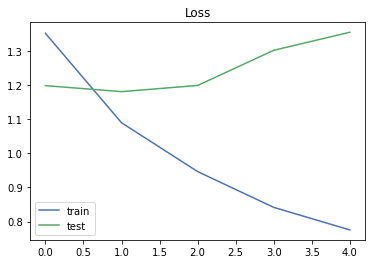

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();